In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from fredapi import Fred

In [2]:
fred = Fred(api_key='6cc00d6dd7a79e8de471491dc74cc1fe')
nber=fred.get_series('USREC')

In [3]:

df=pd.read_csv('Data\Transformed HistoricalVariables.csv',index_col=0)
df['target']=nber
df['target'].fillna(method='ffill',inplace=True)
df.drop(index='2023-04-30',inplace=True)
df=df.fillna(0)

In [4]:
df_train=df[:10000]
df_test=df[10000:]

In [5]:
var_columns = [col for col in df_train.columns if col not in ['target']]

x= df_train.loc[:,var_columns]
y = df_train.loc[:,'target']

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [8]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    model_gbm = GradientBoostingClassifier(n_estimators=5000,
                                        learning_rate=learning_rate,
                                        max_depth=3,
                                        subsample=0.5,
                                        validation_fraction=0.1,
                                        n_iter_no_change=20,
                                        max_features='log2',
                                        verbose=0)
    model_gbm.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(model_gbm.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model_gbm.score(X_test, Y_test)))

Learning rate:  0.05
Accuracy score (training): 0.941
Accuracy score (validation): 0.923
Learning rate:  0.075
Accuracy score (training): 0.941
Accuracy score (validation): 0.921
Learning rate:  0.1
Accuracy score (training): 0.941
Accuracy score (validation): 0.920
Learning rate:  0.25
Accuracy score (training): 0.942
Accuracy score (validation): 0.922
Learning rate:  0.5
Accuracy score (training): 0.944
Accuracy score (validation): 0.914
Learning rate:  0.75
Accuracy score (training): 0.929
Accuracy score (validation): 0.911
Learning rate:  1
Accuracy score (training): 0.916
Accuracy score (validation): 0.897


In [9]:
from sklearn.metrics import f1_score
results=pd.DataFrame()
results['actual']=df[df.columns[-1]]
results['pred']=model_gbm.predict(df[df.columns[:-1]])

dfff=results.iloc[10000:]

f1_score(dfff['actual'], dfff['pred'])

0.4787234042553192

In [10]:
import matplotlib.pyplot as plt

<Axes: >

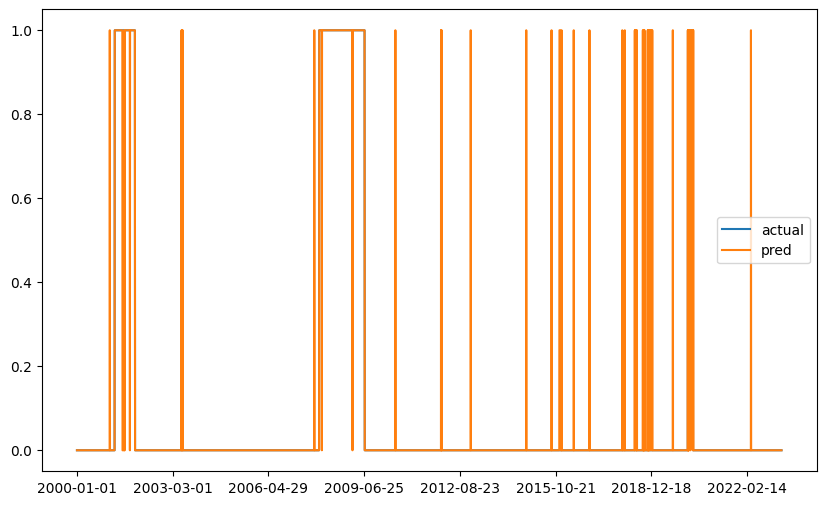

In [16]:
results=pd.DataFrame()
results['actual']=df[df.columns[-1]]
results['pred']=model_gbm.predict(df[df.columns[:-1]])
results.loc['2000':].plot(figsize=(10,6))


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
model_gbm2 = GradientBoostingClassifier(n_estimators=5000,
                                        learning_rate=0.075,
                                        max_depth=3,
                                        subsample=0.5,
                                        validation_fraction=0.1,
                                        n_iter_no_change=20,
                                        max_features='log2',
                                        verbose=0)
model_gbm2.fit(X_train, Y_train)
prediction=model_gbm2.predict(df[df.columns[:-1]])


In [14]:
print("Classification Report")
print(classification_report(df[df.columns[-1]], prediction))

Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     11744
         1.0       0.90      0.75      0.81      1919

    accuracy                           0.95     13663
   macro avg       0.93      0.87      0.89     13663
weighted avg       0.95      0.95      0.95     13663

